In [1]:
import impact_sensitivity_tests.ca2c_sensitivity_impact
import impact_sensitivity_tests.ha_sensitivity_impact
import impact_sensitivity_tests.na2c_sensitivity_impact
import impact_sensitivity_tests.sp_sensitivity_impact
import shock_sensitivity_tests.ca2c_sensitivity_shock
import shock_sensitivity_tests.ha_sensitivity_shock
import shock_sensitivity_tests.na2c_sensitivity_shock
import shock_sensitivity_tests.sp_sensitivity_shock


Cifuentes_Impact_lambda = 0.0! All 5 participants are: [0, 1, 2, 3, 4].


RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self' in call to _th_addmm

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [4]:
impact_processes = ('ca2c_sensitivity_impact', 'ha_sensitivity_impact', 'na2c_sensitivity_impact', 'sp_sensitivity_impact')
shock_processes = ('ca2c_sensitivity_shock', 'ha_sensitivity_shock', 'na2c_sensitivity_shock', 'sp_sensitivity_shock')  



In [ ]:

def run(process):
    print(process)
    if process[-1] == 't':
        os.system('python -m impact_sensitivity_tests.{}'.format(process))   
    elif process[-1] == 'k':
        os.system('python -m shock_sensitivity_tests.{}'.format(process))  
    
pool = Pool(processes = 8)                                                        
pool.map(run, (impact_processes, shock_processes))       

ca2c_sensitivity_shock
na2c_sensitivity_impact


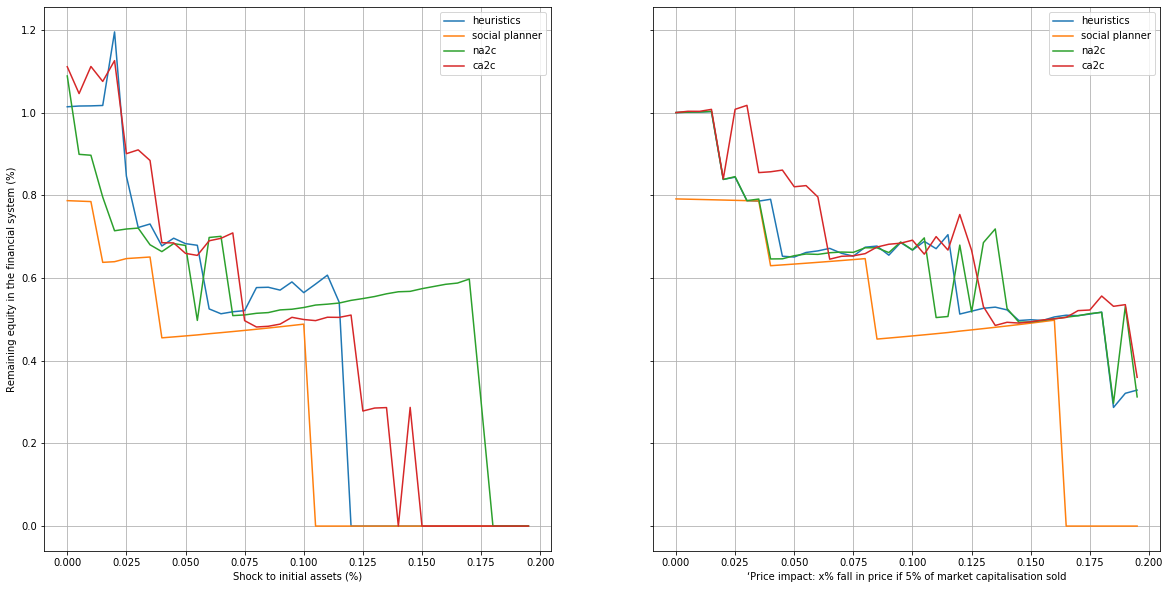

In [6]:
impact_ls = [0.001 * x for x in range(0, 200, 5)]
shocks = [0.001 * x for x in range(0, 200, 5)]

fig,(ax1,ax2)=plt.subplots(1, 2, sharey=True, figsize=(20, 10))
ax1.grid()
ax1.set(xlabel='Shock to initial assets (%)', ylabel='Remaining equity in the financial system (%)')
for process in shock_processes:
    process=pd.read_csv('/home/tonyairhe_gmail_com/'+ process+'.txt', header=None)
    ax1.plot(shocks, process.values)
ax1.legend(('heuristics', 'social planner', 'na2c', 'ca2c'))


ax2.set(xlabel='‘Price impact: x% fall in price if 5% of market capitalisation sold')
for process in impact_processes:
    process=pd.read_csv('/home/tonyairhe_gmail_com/'+ process+'.txt', header=None)
    ax2.plot(impact_ls, process.values)
ax2.legend(('heuristics', 'social planner', 'na2c', 'ca2c'))
ax2.grid()




plt.show()
